In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image


In [2]:
# import mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [65]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [81]:
autoencoder = tf.keras.Sequential()
autoencoder.add(tf.keras.layers.Input(shape=(784,)))
autoencoder.add(tf.keras.layers.Dense(256, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(64, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(16, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(64, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(256, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(784, activation='sigmoid'))  # Corrected line

In [82]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train,
                epochs=27,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/27
469/469 [==============================] - 2s 3ms/step - loss: 0.0151 - val_loss: 1.3303e-07
Epoch 2/27
469/469 [==============================] - 1s 3ms/step - loss: 1.2723e-07 - val_loss: 1.2079e-07
Epoch 3/27
469/469 [==============================] - 1s 3ms/step - loss: 1.1365e-07 - val_loss: 1.0621e-07
Epoch 4/27
469/469 [==============================] - 2s 3ms/step - loss: 9.8647e-08 - val_loss: 9.1027e-08
Epoch 5/27
469/469 [==============================] - 1s 3ms/step - loss: 8.3678e-08 - val_loss: 7.6428e-08
Epoch 6/27
469/469 [==============================] - 1s 3ms/step - loss: 6.9679e-08 - val_loss: 6.3121e-08
Epoch 7/27
469/469 [==============================] - 1s 3ms/step - loss: 5.7173e-08 - val_loss: 5.1455e-08
Epoch 8/27
469/469 [==============================] - 1s 3ms/step - loss: 4.6369e-08 - val_loss: 4.1518e-08
Epoch 9/27
469/469 [==============================] - 1s 3ms/step - loss: 3.7267e-08 - val_loss: 3.3238e-08
Epoch 10/27
469/469 [===========

In [83]:
x_predictions = autoencoder.predict(x_test)

313/313 [==============================] - 0s 526us/step


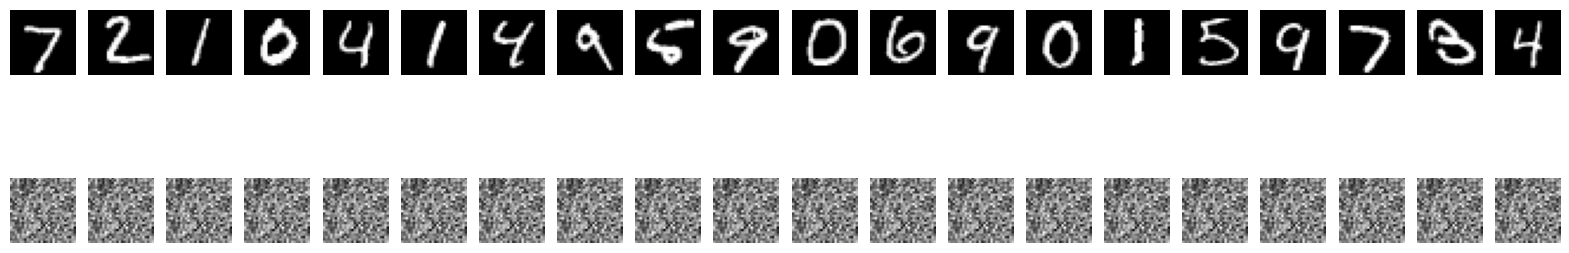

In [84]:
plt.figure(figsize=(20, 4))  # Adjust the size as needed

for i in range(20):
    # Original image
    plt.subplot(2, 20, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 20, i+21)
    plt.imshow(x_predictions[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

Mean Squared Error: 1.0783800519220677e-07


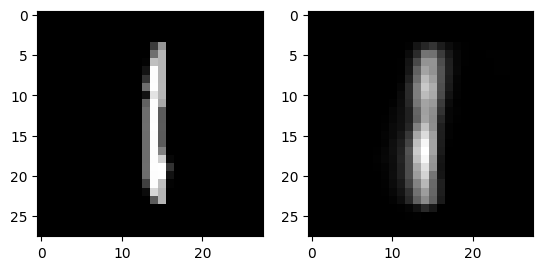

In [57]:
from sklearn.metrics import mean_squared_error
random_index = np.random.randint(len(x_test))
plt.subplot(1, 2, 1)
plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(x_predictions[random_index].reshape(28, 28), cmap='gray')
error = mean_squared_error(x_test[random_index], x_predictions[random_index])
print(f"Mean Squared Error: {error}")
